In [151]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
import numpy.random as random
import scipy.stats as scs

In [152]:
def simupoisson(a):
    p = np.exp(-a)
    i = 0
    q = p
    u = random.rand()
    while u>q:
        i += 1
        p *= a/i
        q += p
    return i

In [219]:
def testpoisson(a,N,borne):
    x = np.linspace(0,borne+1,N)
    S = [simupoisson(a) for i in range(N)]
    Y = [np.exp(-a) * (a**k/math.factorial(k)) for k in range(0,borne+1)]
    width = 0.01
    card = plt.hist(S, np.arange(0,borne+2))
    plt.clf()
    plt.figure()
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.bar(np.arange(0,borne+1),card[0]/N,width = 0.2)
    plt.bar(np.arange(0,borne+1)+0.2,Y,width = 0.2)
    plt.title('comparaison du diagramme en bâton de loi empirique et de la loi théorique pour $N=$'+str(N))
    plt.legend([u'diagramme en bâton de loi empirique',u'diagramme en bâton de loi théorique'])
    plt.show()  

<Figure size 640x480 with 0 Axes>

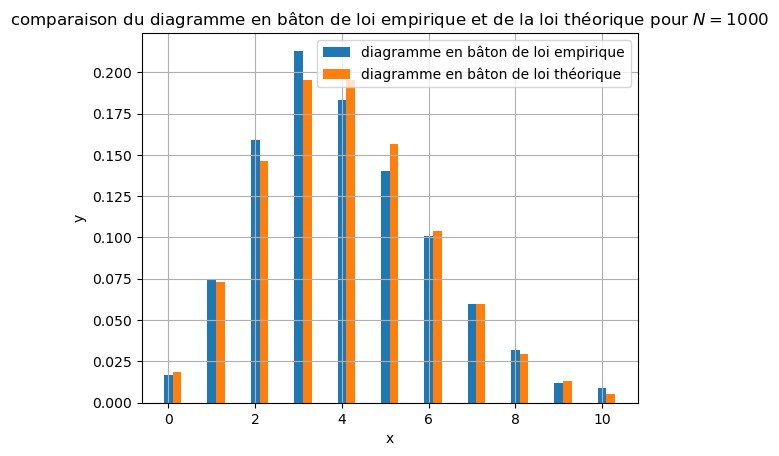

In [220]:
testpoisson(4,1000,10)

In [221]:
def inv_F(U,aplha):
    return U**(1/alpha)

def simubeta(alpha):
    return inv_F(random.rand(),alpha)

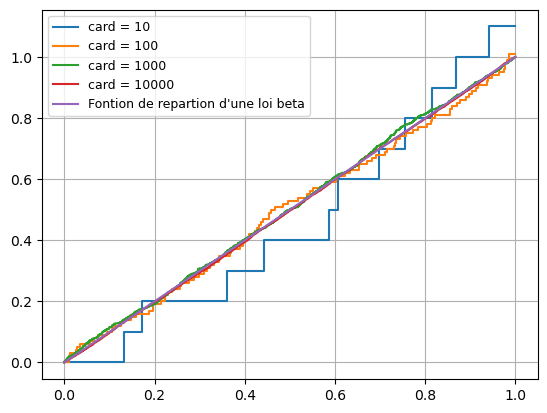

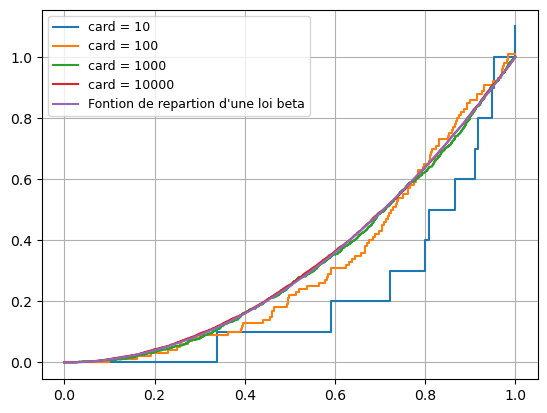

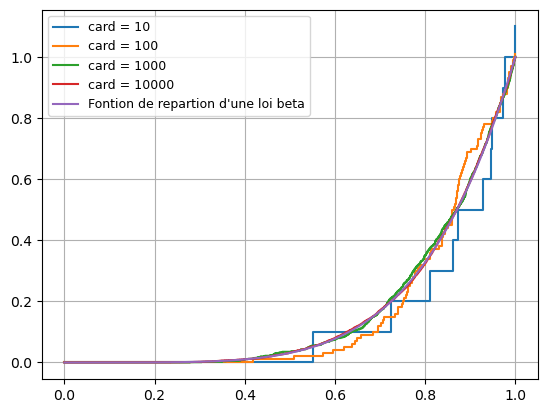

In [246]:
def testbeta(alpha,M):
    ech = [simubeta(alpha) for i in range(M+1)]
    X = np.concatenate(([0],ech,[1]))
    X.sort()
    Y = [0]
    for i in range(M+2):
        Y.append(i/M)
    plt.step(X,Y,label=f'card = {M}')
    plt.legend()
    plt.grid(True)
    
for alpha in [1,2,5]:
    plt.figure()
    for m in [10,100,1000,10000]:
        testbeta(alpha,m)
    x = np.linspace(0,1,10000)
    plt.plot(x,x**alpha,label='Fontion de repartion d\'une loi beta')
    plt.legend(fontsize=9)